In [2]:
import pandas as pd
import numpy as np

In [3]:
students_perfomance = pd.read_csv('C:/Users/User/Desktop/dtml/StudentsPerformance.csv')

## Base

In [36]:
students_perfomance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [100]:
students_perfomance.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
students_perfomance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
students_perfomance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
students_perfomance.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [31]:
students_perfomance.iloc[:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
students_perfomance.loc[:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


## filtration

In [38]:
students_perfomance.loc[students_perfomance.gender == 'female', ['gender', 'lunch']]

,gender,lunch
0,female,standard
1,female,standard
2,female,standard
5,female,standard
6,female,standard
...,...,...
993,female,free/reduced
995,female,standard
997,female,free/reduced
998,female,standard


In [44]:
mean_writing_score = students_perfomance['writing score'].mean()

In [45]:
mean_writing_score

68.054

In [46]:
students_perfomance.loc[students_perfomance['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [49]:
query = (students_perfomance['writing score'] > mean_writing_score) & (students_perfomance.gender == 'female')

In [51]:
query

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [52]:
students_perfomance.loc[query].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [59]:
lunch_count = students_perfomance.loc[students_perfomance.lunch == 'free/reduced']

In [60]:
lunch_count

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65


In [62]:
students_perfomance.shape

(1000, 8)

In [64]:
students_perfomance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [65]:
lunch_count.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [4]:
students_perfomance = students_perfomance \
    .rename(columns = 
            {'parental level of education' : 'parental_level_of_education',
             'test preparation course' : 'test_preparation_course',
             'math score' : 'math_score',
             'reading score' : 'reading_score',
             'writing score' : 'writing_score'})

In [5]:
students_perfomance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [69]:
students_perfomance.math_score

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [72]:
students_perfomance.query("gender == 'female' | writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [73]:
writing_score_query = 74

In [75]:
students_perfomance.query('writing_score > @writing_score_query')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [6]:
score_list = [i for i in list(students_perfomance) if 'score' in i]

In [7]:
students_perfomance[score_list]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [81]:
students_perfomance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [8]:
students_perfomance.groupby('gender').aggregate({'math_score' : 'mean', 'reading_score' : 'mean'})

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [9]:
mean_scores = students_perfomance.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score' : 'mean', 'reading_score' : 'mean'}) \
    .rename(columns= ({'math_score' : 'mean_math_score', 'reading_score' : 'mean_reading_score'}))

# с as_index=True получается многоуровневая таблица

In [10]:
mean_scores

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [98]:
students_perfomance.math_score.unique() 
# all unique scores

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [99]:
students_perfomance.math_score.nunique()
# number of unique scores

81

In [103]:
students_perfomance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [109]:
students_perfomance.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head(5)
# w/o ascending=False least->biggest

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [12]:
# create new column
students_perfomance['total_score'] = students_perfomance.math_score + students_perfomance.reading_score + \
    students_perfomance.writing_score

In [13]:
students_perfomance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [14]:
students_perfomance = students_perfomance.assign(total_score_log = np.log(students_perfomance['total_score']))

In [15]:
students_perfomance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [16]:
# delete column
students_perfomance.drop(['total_score', 'lunch'], axis=1)

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


## matplotlib/seaborn

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

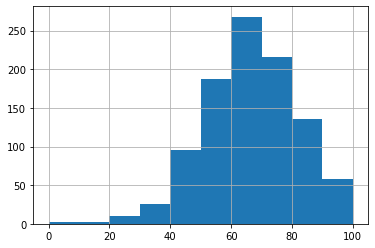

In [18]:
students_perfomance.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

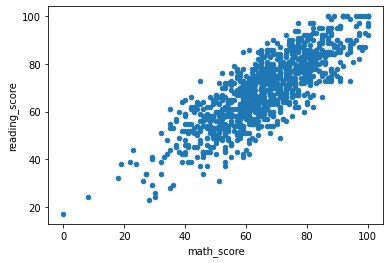

In [20]:
students_perfomance.plot.scatter(x='math_score', y='reading_score')

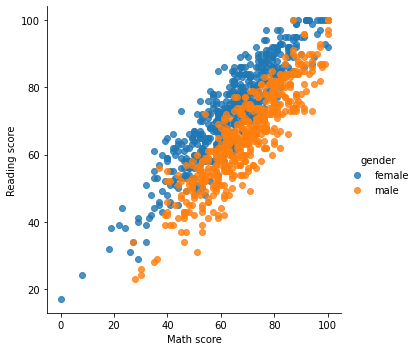

In [26]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_perfomance, fit_reg=False)
# hue - группирующая переменная
# прямые на графике - регрессионные прямые 
# fit_reg(ression)=False removes them
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

## students_perfomance_with_names

In [13]:
students_perfomance_with_names = students_perfomance.iloc[[0,3, 8, 11, 14]]

In [14]:
students_perfomance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
3,male,group A,associate's degree,free/reduced,none,47,57,44
8,male,group D,high school,free/reduced,completed,64,64,67
11,male,group D,associate's degree,standard,none,40,52,43
14,female,group A,master's degree,standard,none,50,53,58


In [17]:
students_perfomance_with_names.index = ['Sher', 'Joyce', 'Kris', 'Kate', 'Caleb']

In [18]:
students_perfomance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Sher,female,group B,bachelor's degree,standard,none,72,72,74
Joyce,male,group A,associate's degree,free/reduced,none,47,57,44
Kris,male,group D,high school,free/reduced,completed,64,64,67
Kate,male,group D,associate's degree,standard,none,40,52,43
Caleb,female,group A,master's degree,standard,none,50,53,58


In [21]:
students_perfomance_with_names.loc[['Sher', 'Kris', 'Caleb'], ['gender', 'math score']]

,gender,math score
Sher,female,72
Kris,male,64
Caleb,female,50


In [22]:
students_perfomance_with_names.iloc[:, 0]

Sher     female
Joyce      male
Kris       male
Kate       male
Caleb    female
Name: gender, dtype: object

In [23]:
type(students_perfomance_with_names.iloc[:, 0])

pandas.core.series.Series

In [25]:
pd.Series([1, 2, 3], index=['Sher', 'Joyce', 'Kris'])

Sher     1
Joyce    2
Kris     3
dtype: int64

In [26]:
my_series = pd.Series([1, 2, 3], index=['Sher', 'Joyce', 'Kris'])
my_series_1 = pd.Series([4, 5, 6], index=['Sher', 'Joyce', 'Kris'])

In [27]:
pd.DataFrame({'column' : my_series, 'column_1' : my_series_1})

,column,column_1
Sher,1,4
Joyce,2,5
Kris,3,6


In [29]:
students_perfomance_with_names[['gender']]

,gender
Sher,female
Joyce,male
Kris,male
Kate,male
Caleb,female


In [86]:
students_perfomance_with_names.filter(like='c', axis=1)
# axis = 0 - rows
# axis = 1 - columns

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Sher,group B,bachelor's degree,standard,none,72,72,74
Joyce,group A,associate's degree,free/reduced,none,47,57,44
Kris,group D,high school,free/reduced,completed,64,64,67
Kate,group D,associate's degree,standard,none,40,52,43
Caleb,group A,master's degree,standard,none,50,53,58
